In [49]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = "<style>svg{width: 10% !important; height: 10% !important;} </style>"
HTML(style)

In [4]:
titanik_data = pd.read_csv('../JupyterProjects/Go Data Science/train.csv')

In [5]:
titanik_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanik_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
X = titanik_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanik_data.Survived

In [8]:
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})

In [9]:
clf = tree.DecisionTreeClassifier(class_weight=None,criterion='entropy',
                                 max_depth=None, max_features=None)

In [10]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

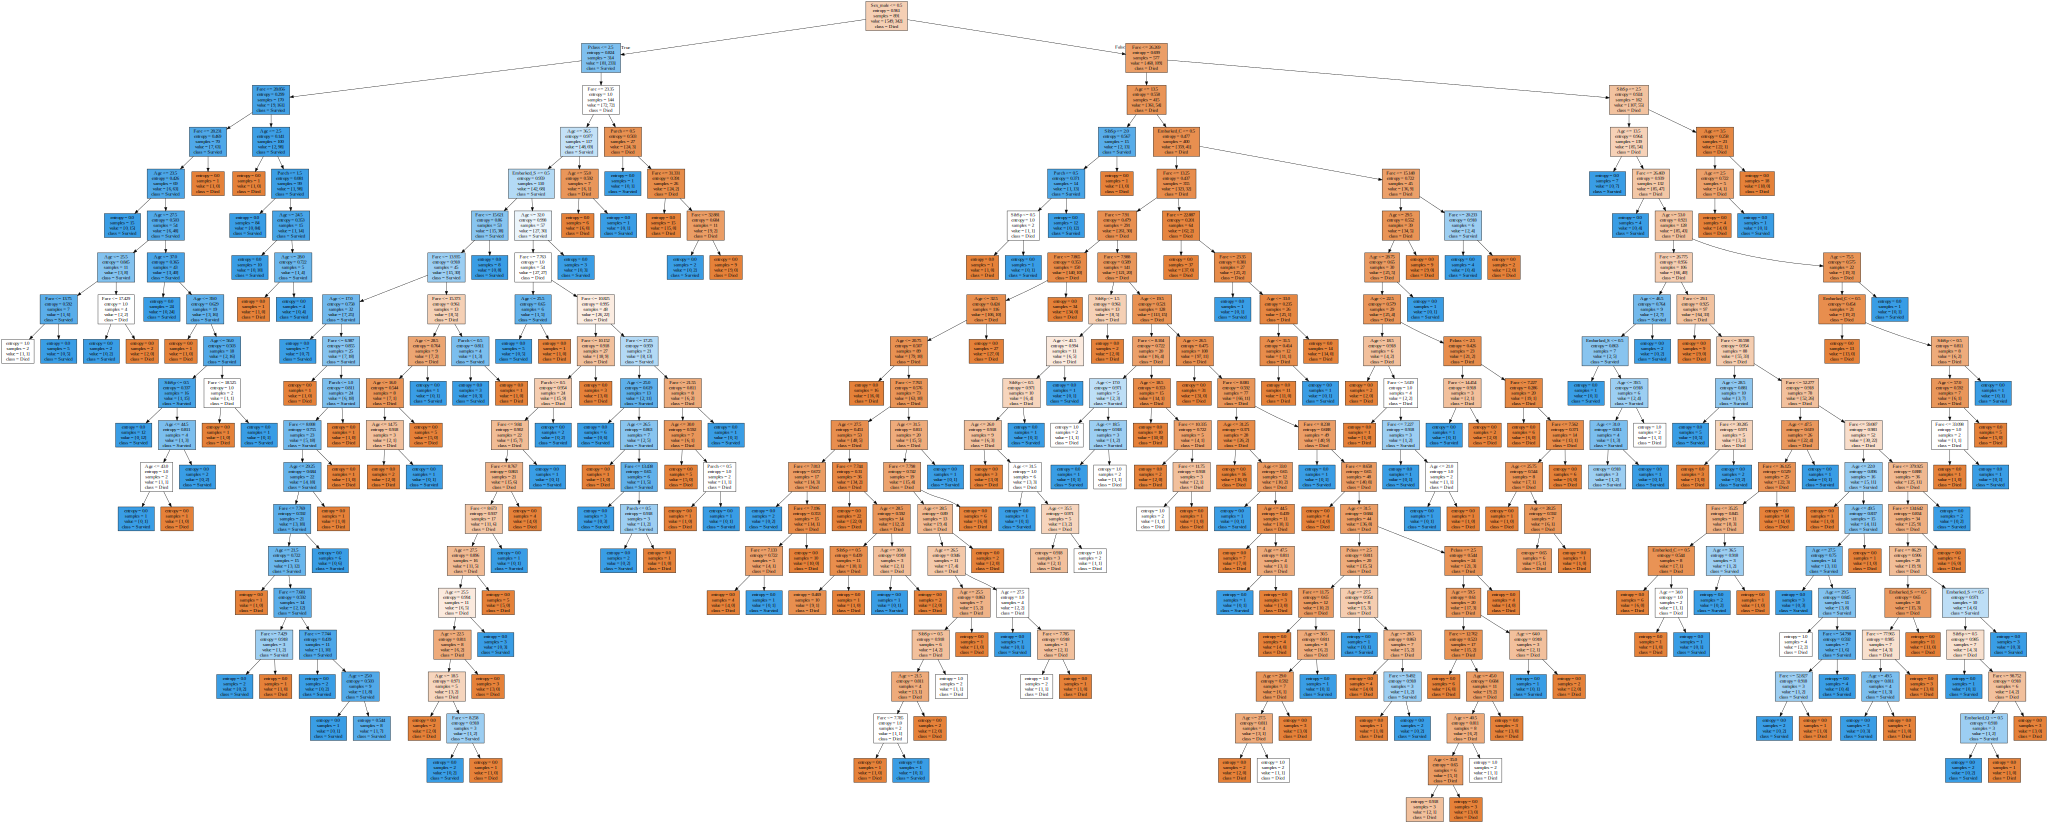

In [11]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X), class_names=['Died','Survied'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                 max_depth=3)

In [15]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
max_depth_values = range(1,100)

In [17]:
scores_data = pd.DataFrame()

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_data_score = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_data_score)

In [21]:
scores_data.head(2)

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196


In [22]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', 
                           value_name='score')

In [23]:
scores_data_long.head(2)

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369


In [24]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.803754
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.800364
206,9,cross_val_score,0.802031
207,10,cross_val_score,0.798669


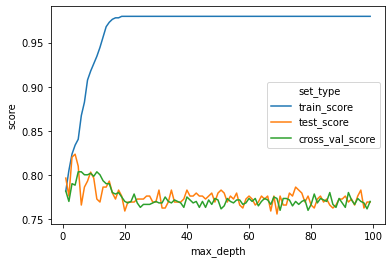

In [25]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long);

In [26]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy',
                                 max_depth=5)

In [27]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [28]:
best_clf.score(X_train, y_train)

0.8406040268456376

In [29]:
best_clf.fit(X_test, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [30]:
best_clf.score(X_test, y_test)

0.8711864406779661

In [31]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7966101694915254

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
clf = tree.DecisionTreeClassifier()

In [34]:
parametrs = {'criterion': ['gini','entropy'],
             'max_depth': range(1, 30)}

In [35]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [36]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [37]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [38]:
best_clf = grid_search_cv_clf.best_estimator_

In [39]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [40]:
best_clf.score(X_test, y_test)

0.8067796610169492

In [41]:
from sklearn.metrics import precision_score, recall_score

In [42]:
y_pred = best_clf.predict(X_test)

In [43]:
precision_score(y_test, y_pred)

0.8315789473684211

In [44]:
recall_score(y_test, y_pred)

0.6583333333333333

In [45]:
y_predicted_prob = best_clf.predict_proba(X_test)

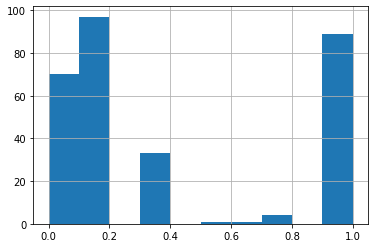

In [48]:
pd.Series(y_predicted_prob[:, 1]).hist();

In [58]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1, 0)

In [59]:
precision_score(y_test, y_pred)

0.8426966292134831

In [60]:
recall_score(y_test, y_pred)

0.625

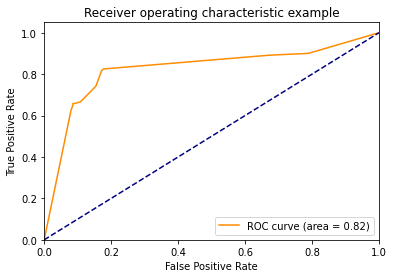

In [67]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()